In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Loading datasets
vehicle_data = pd.read_csv('../data/vehicle_maintenance_data.csv')
engine_data = pd.read_csv('../data/engine_data.csv')
sensor_data = pd.read_csv('../data/vehicle_sensor_data.csv')

In [4]:
# Display initial rows
display(vehicle_data.head())
display(engine_data.head())
display(sensor_data.head())

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,2023-11-23,2025-06-24,Second,20782,6,3,13.622204,New,New,Weak,1
1,Van,60353,Average,1,7,Electric,Automatic,2500,133630,2023-09-21,2025-06-04,Second,23489,7,0,13.625307,New,New,Weak,1
2,Bus,68072,Poor,0,2,Electric,Automatic,1500,34022,2023-06-27,2025-04-27,First,17979,7,0,14.306302,New,Good,Weak,1
3,Bus,60849,Average,4,5,Petrol,Automatic,2500,81636,2023-08-24,2025-11-05,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,Bus,45742,Poor,5,1,Petrol,Manual,2000,97162,2023-05-25,2025-09-14,Third,16446,6,2,16.977482,Good,Good,Weak,1


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


,Engine Temperature (°C),Brake Pad Thickness (mm),Tire Pressure (PSI),Maintenance Type,Anomaly Indication
0,81.022390,7.984018,35.964546,Repair,0
1,98.076029,10.718692,32.143593,Routine Maintenance,1
2,81.205967,10.983070,31.058628,Routine Maintenance,1
3,86.081294,7.045311,28.539264,Repair,0
4,93.496568,9.948991,33.599560,Component Replacement,1


In [5]:
# Check info about datasets
vehicle_data.info()
engine_data.info()
sensor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vehicle_Model         50000 non-null  object 
 1   Mileage               50000 non-null  int64  
 2   Maintenance_History   50000 non-null  object 
 3   Reported_Issues       50000 non-null  int64  
 4   Vehicle_Age           50000 non-null  int64  
 5   Fuel_Type             50000 non-null  object 
 6   Transmission_Type     50000 non-null  object 
 7   Engine_Size           50000 non-null  int64  
 8   Odometer_Reading      50000 non-null  int64  
 9   Last_Service_Date     50000 non-null  object 
 10  Warranty_Expiry_Date  50000 non-null  object 
 11  Owner_Type            50000 non-null  object 
 12  Insurance_Premium     50000 non-null  int64  
 13  Service_History       50000 non-null  int64  
 14  Accident_History      50000 non-null  int64  
 15  Fuel_Efficiency    

In [6]:
# Check missing values
print("\nMissing Values in Vehicle Data:")
print(vehicle_data.isnull().sum())
print("\nMissing Values in Engine Data:")
print(engine_data.isnull().sum())
print("\nMissing Values in Sensor Data:")
print(sensor_data.isnull().sum())


Missing Values in Vehicle Data:
Vehicle_Model           0
Mileage                 0
Maintenance_History     0
Reported_Issues         0
Vehicle_Age             0
Fuel_Type               0
Transmission_Type       0
Engine_Size             0
Odometer_Reading        0
Last_Service_Date       0
Warranty_Expiry_Date    0
Owner_Type              0
Insurance_Premium       0
Service_History         0
Accident_History        0
Fuel_Efficiency         0
Tire_Condition          0
Brake_Condition         0
Battery_Status          0
Need_Maintenance        0
dtype: int64

Missing Values in Engine Data:
Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

Missing Values in Sensor Data:
Engine Temperature (°C)     0
Brake Pad Thickness (mm)    0
Tire Pressure (PSI)         0
Maintenance Type            0
Anomaly Indication          0
dtype: int64


In [7]:
# Ensure timestamp columns are in datetime format
for df in [vehicle_data, engine_data, sensor_data]:
    if 'timestamp' in df.columns:
        df['timestamp'] = pd.to_datetime(df['timestamp'])

In [8]:
# Adding Synthetic Timestamps for Merging

vehicle_data['timestamp'] = pd.date_range(start='2025-01-01', periods=len(vehicle_data), freq='D')
engine_data['timestamp'] = pd.date_range(start='2025-01-01', periods=len(engine_data), freq='h')
sensor_data['timestamp'] = pd.date_range(start='2025-01-01', periods=len(sensor_data), freq='h')

In [9]:
# Add vehicle_id for consistency if missing
if 'vehicle_id' not in vehicle_data.columns:
    vehicle_data['vehicle_id'] = range(1, len(vehicle_data) + 1)
if 'vehicle_id' not in engine_data.columns:
    engine_data['vehicle_id'] = range(1, len(engine_data) + 1)
if 'vehicle_id' not in sensor_data.columns:
    sensor_data['vehicle_id'] = range(1, len(sensor_data) + 1)

In [10]:
# Merge datasets based on vehicle_id and timestamp

merged_data = pd.merge_asof(vehicle_data.sort_values('timestamp'), 
                            engine_data.sort_values('timestamp'), 
                            on='timestamp', 
                            by='vehicle_id', 
                            direction='nearest')

In [11]:
# Merge with sensor data
merged_data = pd.merge_asof(merged_data.sort_values('timestamp'),
                            sensor_data.sort_values('timestamp'),
                            on='timestamp',
                            by='vehicle_id',
                            direction='nearest')

In [12]:
# Display merged dataset info
merged_data.info()
display(merged_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Vehicle_Model             50000 non-null  object        
 1   Mileage                   50000 non-null  int64         
 2   Maintenance_History       50000 non-null  object        
 3   Reported_Issues           50000 non-null  int64         
 4   Vehicle_Age               50000 non-null  int64         
 5   Fuel_Type                 50000 non-null  object        
 6   Transmission_Type         50000 non-null  object        
 7   Engine_Size               50000 non-null  int64         
 8   Odometer_Reading          50000 non-null  int64         
 9   Last_Service_Date         50000 non-null  object        
 10  Warranty_Expiry_Date      50000 non-null  object        
 11  Owner_Type                50000 non-null  object        
 12  Insurance_Premium 

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,...,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition,Engine Temperature (°C),Brake Pad Thickness (mm),Tire Pressure (PSI),Maintenance Type,Anomaly Indication
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,2023-11-23,...,11.790927,3.178981,84.144163,81.632187,1.0,81.022390,7.984018,35.964546,Repair,0.0
1,Van,60353,Average,1,7,Electric,Automatic,2500,133630,2023-09-21,...,16.193866,2.464504,77.640934,82.445724,0.0,98.076029,10.718692,32.143593,Routine Maintenance,1.0
2,Bus,68072,Poor,0,2,Electric,Automatic,1500,34022,2023-06-27,...,6.553147,1.064347,77.752266,79.645777,1.0,81.205967,10.983070,31.058628,Routine Maintenance,1.0
3,Bus,60849,Average,4,5,Petrol,Automatic,2500,81636,2023-08-24,...,19.510172,3.727455,74.129907,71.774629,1.0,86.081294,7.045311,28.539264,Repair,0.0
4,Bus,45742,Poor,5,1,Petrol,Manual,2000,97162,2023-05-25,...,15.738871,2.052251,78.396989,87.000225,0.0,93.496568,9.948991,33.599560,Component Replacement,1.0


In [19]:
# As we can see, there are some inconsistencies in the data so let's address them

# DATA CLEANING

# Step 1: Modify Electric Fuel Types

# Analyze the distribution of electric vehicles
print("Electric Vehicle Count by Model:")
print(vehicle_data[vehicle_data['Fuel_Type'] == 'Electric']['Vehicle_Model'].value_counts())

# Replace 'Electric' with the appropriate fuel type
vehicle_data['Fuel_Type'] = vehicle_data.apply(
    lambda row: 'Petrol' if row['Engine_Size'] <= 2000 else 'Diesel' if row['Fuel_Type'] == 'Electric' else row['Fuel_Type'], 
    axis=1
)

# Confirm that electric vehicles are removed
print("\nUpdated Fuel Type Distribution:")
print(vehicle_data['Fuel_Type'].value_counts())

Electric Vehicle Count by Model:
Series([], Name: count, dtype: int64)

Updated Fuel Type Distribution:
Fuel_Type
Petrol    28913
Diesel     4432
Name: count, dtype: int64


In [20]:
# Step 2: Match Tire Pressures

# Calculate mean tire pressure for cars from sensor dataset
car_tire_pressure_mean = sensor_data['Tire Pressure (PSI)'].mean()
print(f"\nAverage Tire Pressure for Cars: {car_tire_pressure_mean:.2f} PSI")

# Apply tire pressure rules
def assign_tire_pressure(row):
    # Cars: Use mean pressure from sensor_data
    if row['Vehicle_Model'] == 'Car':
        return car_tire_pressure_mean
    
    # Buses: Typically 60-100 PSI
    elif row['Vehicle_Model'] == 'Bus':
        return np.random.uniform(60, 100)
    
    # Trucks: 80-120 PSI
    elif row['Vehicle_Model'] == 'Truck':
        return np.random.uniform(80, 120)
    
    # Vans: 35-45 PSI
    elif row['Vehicle_Model'] == 'Van':
        return np.random.uniform(35, 45)
    
    # Default fallback
    return np.nan

# Assign tire pressures
vehicle_data['Tire Pressure (PSI)'] = vehicle_data.apply(assign_tire_pressure, axis=1)

# Remove rows with missing tire pressure
vehicle_data.dropna(subset=['Tire Pressure (PSI)'], inplace=True)

# Validate the results
print("\nTire Pressure Distribution After Assignment:")
print(vehicle_data.groupby('Vehicle_Model')['Tire Pressure (PSI)'].describe())



Average Tire Pressure for Cars: 33.09 PSI

Tire Pressure Distribution After Assignment:
                count       mean           std        min        25%  \
Vehicle_Model                                                          
Bus            8414.0  80.247565  1.151390e+01  60.005289  70.263128   
Car            8203.0  33.090653  7.105860e-15  33.090653  33.090653   
Truck          8328.0  99.848339  1.153800e+01  80.000074  89.836906   
Van            8400.0  40.000084  2.909975e+00  35.002067  37.466753   

                     50%         75%         max  
Vehicle_Model                                     
Bus            80.505815   90.315891   99.995762  
Car            33.090653   33.090653   33.090653  
Truck          99.818707  109.769242  119.998131  
Van            40.012846   42.516295   44.999813  


In [21]:
# Step 3A: Identify Mileage-Age Anomalies

# Calculate mileage per year
vehicle_data['mileage_per_year'] = vehicle_data['Mileage'] / (vehicle_data['Vehicle_Age'] + 1)

# Flag vehicles with extremely low mileage per year
anomalies = vehicle_data[vehicle_data['mileage_per_year'] < 1000]
print(f"\nMileage-Age Anomalies (Mileage < 1000 km/year):\n{anomalies}")

# Remove these anomalies
vehicle_data = vehicle_data[vehicle_data['mileage_per_year'] >= 1000]



Mileage-Age Anomalies (Mileage < 1000 km/year):
Empty DataFrame
Columns: [Vehicle_Model, Mileage, Maintenance_History, Reported_Issues, Vehicle_Age, Fuel_Type, Transmission_Type, Engine_Size, Odometer_Reading, Last_Service_Date, Warranty_Expiry_Date, Owner_Type, Insurance_Premium, Service_History, Accident_History, Fuel_Efficiency, Tire_Condition, Brake_Condition, Battery_Status, Need_Maintenance, timestamp, vehicle_id, Tire Pressure (PSI), mileage_per_year]
Index: []

[0 rows x 24 columns]


In [22]:
# Step 3B: Validate Transmission-Engine Size Patterns

# Identify inconsistencies: Large engines typically have automatic transmissions
inconsistent_transmission = vehicle_data[(vehicle_data['Engine_Size'] > 2500) & (vehicle_data['Transmission_Type'] == 'Manual')]
print(f"\nInconsistent Transmission Assignments:\n{inconsistent_transmission}")

# Correct inconsistencies: Change manual to automatic for engines > 2500 cc
vehicle_data.loc[(vehicle_data['Engine_Size'] > 2500) & (vehicle_data['Transmission_Type'] == 'Manual'), 'Transmission_Type'] = 'Automatic'



Inconsistent Transmission Assignments:
Empty DataFrame
Columns: [Vehicle_Model, Mileage, Maintenance_History, Reported_Issues, Vehicle_Age, Fuel_Type, Transmission_Type, Engine_Size, Odometer_Reading, Last_Service_Date, Warranty_Expiry_Date, Owner_Type, Insurance_Premium, Service_History, Accident_History, Fuel_Efficiency, Tire_Condition, Brake_Condition, Battery_Status, Need_Maintenance, timestamp, vehicle_id, Tire Pressure (PSI), mileage_per_year]
Index: []

[0 rows x 24 columns]


In [23]:
# Step 4: Handle Outliers & Invalid Values

# Remove rows with unrealistic sensor readings
valid_data = vehicle_data[
    (vehicle_data['Mileage'] > 0) &
    (vehicle_data['Engine_Size'] > 500) &
    (vehicle_data['Fuel_Efficiency'] > 2) &
    (vehicle_data['Tire Pressure (PSI)'] > 10)
]

# Display summary after cleaning
print("\nFinal Cleaned Data Summary:")
valid_data.info()

# Save the cleaned dataset
valid_data.to_csv('../data/cleaned_vehicle_data.csv', index=False)



Final Cleaned Data Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 33345 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Vehicle_Model         33345 non-null  object        
 1   Mileage               33345 non-null  int64         
 2   Maintenance_History   33345 non-null  object        
 3   Reported_Issues       33345 non-null  int64         
 4   Vehicle_Age           33345 non-null  int64         
 5   Fuel_Type             33345 non-null  object        
 6   Transmission_Type     33345 non-null  object        
 7   Engine_Size           33345 non-null  int64         
 8   Odometer_Reading      33345 non-null  int64         
 9   Last_Service_Date     33345 non-null  object        
 10  Warranty_Expiry_Date  33345 non-null  object        
 11  Owner_Type            33345 non-null  object        
 12  Insurance_Premium     33345 non-null  int64       

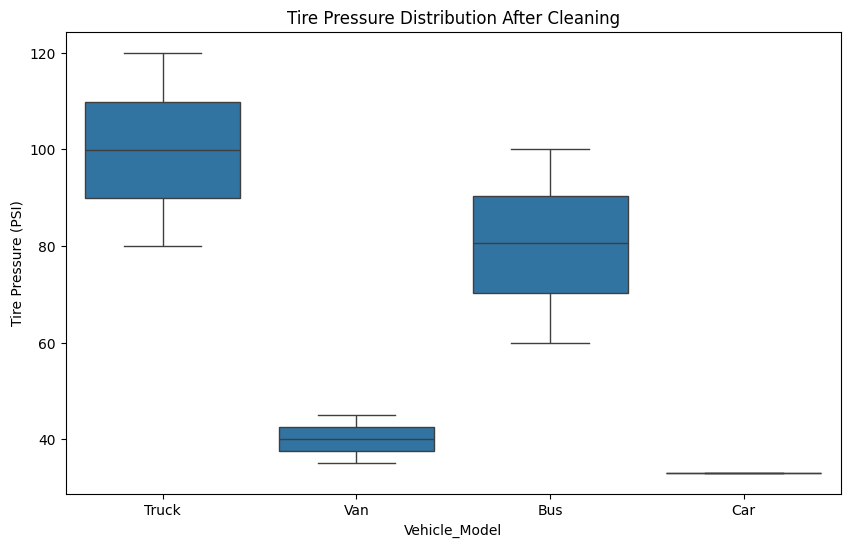

In [25]:
# Visualize Tire Pressure by Vehicle Model
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle_Model', y='Tire Pressure (PSI)', data=valid_data)
plt.title("Tire Pressure Distribution After Cleaning")
plt.show()
